<a href="https://colab.research.google.com/github/Ishankj23/Classification-Project/blob/main/KoustubhJagtap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [337]:
from warnings import filterwarnings
filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

In [338]:
import pandas as pd
df=pd.read_csv("/content/DSINTERN 1.csv")
df.head()

,priority,subject,Description
0,2.0,Wireless Mouse suddenly stops working,"Dear Support Team, I've been using the Wireles..."
1,2.0,Problème de connexions IP PBX,"Bonjour, nous rencontrons un problème avec not..."
2,2.0,Problem mit meinem SFX-Netzteil,"Sehr geehrte Damen und Herren, mein SFX-Netzte..."
3,2.0,Invoice Adjustment Request,"Dear Customer Support,\nI recently received my..."
4,2.0,Issue with Arbitrum: UI not loading,"Hello Support Team,\nI've been experiencing an..."


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   priority     191 non-null    float64
 1   subject      204 non-null    object 
 2   Description  204 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.0+ KB


In [340]:
df.describe()

,priority
count,191.000000
mean,2.235602
std,0.847280
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,5.000000


In [341]:
df.isna().sum()

,0
priority,17
subject,4
Description,4


In [342]:
df.isna().mean()*100

,0
priority,8.173077
subject,1.923077
Description,1.923077


In [343]:
df.duplicated().sum()

0

In [344]:
import matplotlib.pyplot as plt
import seaborn as sns

#### A heatmap is used to visualize where missing data exists.

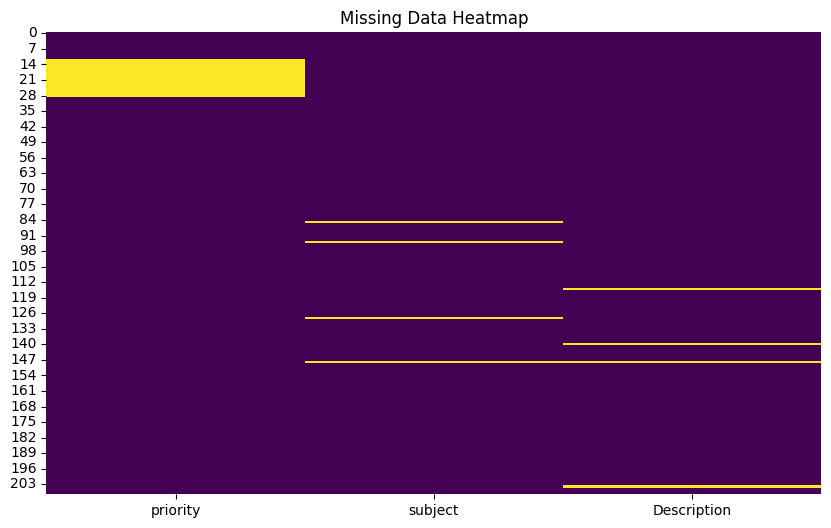

In [345]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Data Heatmap')
plt.show()

#### We use sns.countplot() to create a bar chart showing the distribution of each priority level.

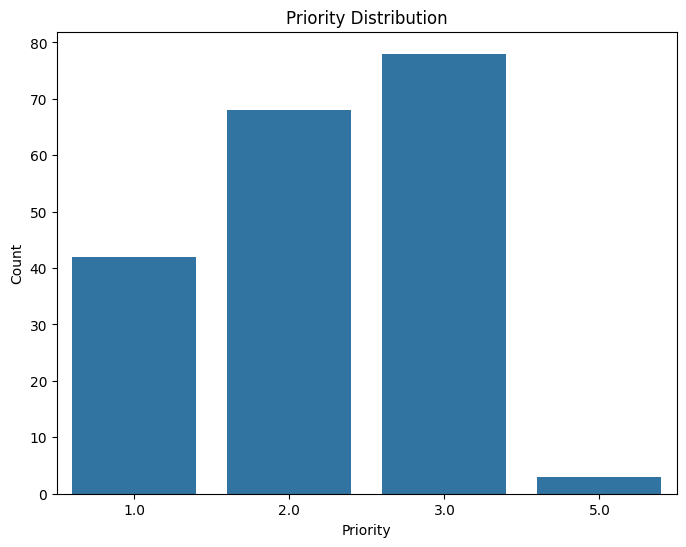

In [346]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='priority')
plt.title('Priority Distribution')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

#### We create two new columns, subject_length and description_length, by calculating the length of the text in the subject and description columns.
#### We then visualize these lengths using sns.boxplot() to see if there is a relationship between the priority and the length of the text.

In [347]:
df['subject_length'] = df['subject'].str.len()
df['description_length'] = df['Description'].str.len()

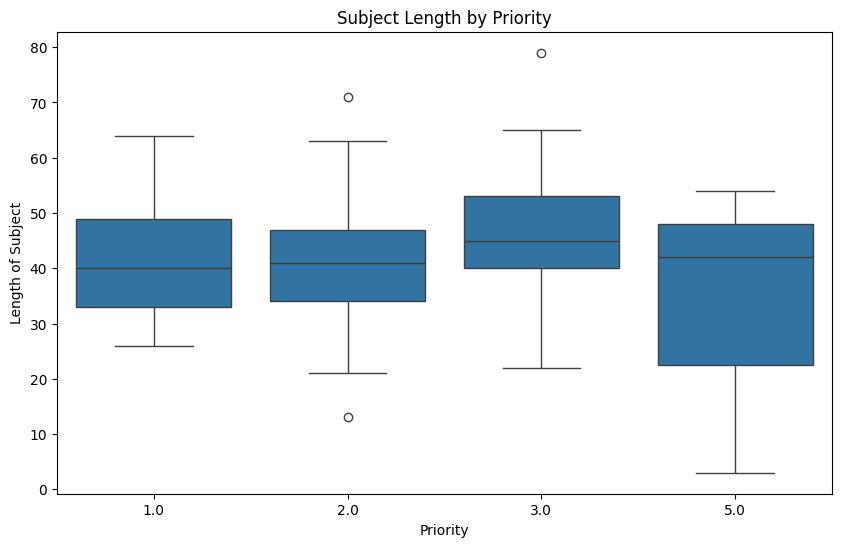

In [348]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='priority', y='subject_length')
plt.title('Subject Length by Priority')
plt.xlabel('Priority')
plt.ylabel('Length of Subject')
plt.show()

#### The subject lengths across all priorities are somewhat similar, with the exception of Priority 5, which has a noticeably lower range of subject lengths.

#### Higher priority numbers like Priority 5 have shorter and more consistent descriptions, while lower priorities have longer and more variable description lengths.

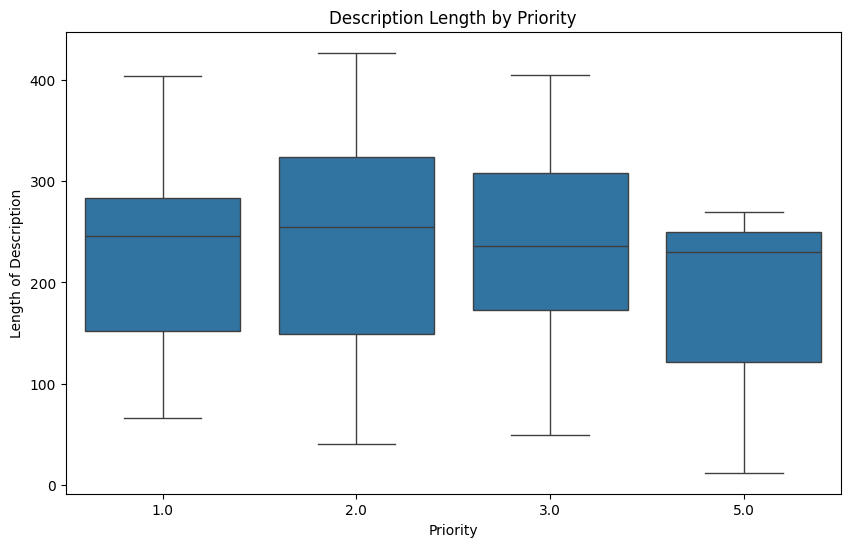

In [349]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='priority', y='description_length')
plt.title('Description Length by Priority')
plt.xlabel('Priority')
plt.ylabel('Length of Description')
plt.show()

# Sentiment Analysis

##### Removing null values as they are less than 20% of the Data

In [350]:
df.dropna(subset=['priority', 'subject', 'Description'], inplace=True)

In [351]:
df['text'] = df['subject'] + ' ' + df['Description']

In [352]:
pip install happytransformer

In [353]:
from happytransformer import HappyTextClassification
happy_tc = HappyTextClassification("XLM_ROBERTA", "joeddav/xlm-roberta-large-xnli", num_labels=3)

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [354]:
def get_sentiment(text):
    result = happy_tc.classify_text(text)
    return result.label

In [355]:
df['sentiment'] = df['text'].apply(get_sentiment)


In [356]:
sentiment_distribution = df.groupby('priority')['sentiment'].value_counts(normalize=True).unstack().fillna(0)
print(sentiment_distribution)

sentiment  entailment   neutral
priority                       
1.0          0.024390  0.975610
2.0          0.061538  0.938462
3.0          0.080000  0.920000
5.0          0.333333  0.666667


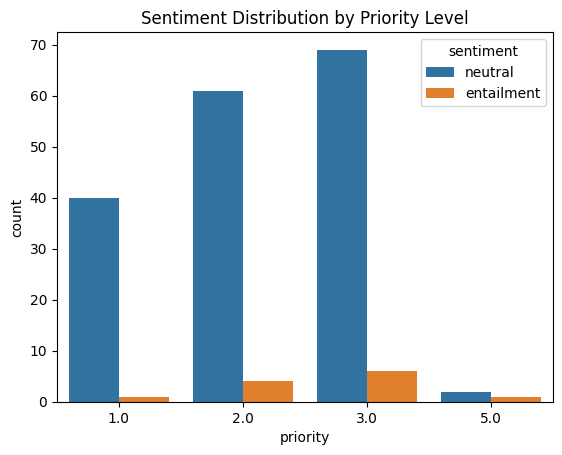

In [357]:
sns.countplot(data=df, x='priority', hue='sentiment')
plt.title("Sentiment Distribution by Priority Level")
plt.show()

# Classification Model and Data Cleaning

In [358]:
pip install langdetect nltk

In [359]:
from langdetect import detect
import nltk
from nltk.corpus import stopwords
import re

In [360]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [361]:
english_stopwords = set(stopwords.words('english'))
print("English stopwords:", english_stopwords)
french_stopwords = set(stopwords.words('french'))
print("French stopwords:", french_stopwords)
spanish_stopwords = set(stopwords.words('spanish'))
print("Spanish stopwords:", spanish_stopwords)
german_stopwords = set(stopwords.words('german'))
print("German stopwords:", german_stopwords)
russian_stopwords = set(stopwords.words('russian'))
print("Russian stopwords:", russian_stopwords)
indonesian_stopwords = set(stopwords.words('indonesian'))
print("Indonesian stopwords:", indonesian_stopwords)

English stopwords: {'again', 'few', "should've", 'not', 'how', 'themselves', 'further', 'he', 'doing', 'shouldn', 'his', "haven't", 'own', 'needn', "couldn't", 'and', 'her', 'if', 'because', "doesn't", 'ours', 'its', 'out', 'most', 'some', 'more', 'm', 'i', 'theirs', 'we', 'was', 'any', 'who', 'at', 's', 'into', 'mustn', 'whom', 'off', 'have', 'yourself', 'she', 'this', 'hasn', 'that', 'our', 'each', "shouldn't", 't', 'when', 'below', 're', 'yourselves', 'being', "mightn't", "weren't", "isn't", 'hadn', 'you', "it's", 'before', 'but', 'down', 'nor', 'wouldn', 'ourselves', 'from', 'up', 'by', 'do', 'these', 'what', 'didn', "you've", 'be', 'shan', 'wasn', 'now', 'until', 'the', "she's", 'been', 'himself', 'can', 'than', 'haven', 'above', 'here', 'aren', 'during', 'those', "mustn't", 'won', 'they', 'same', 'ma', 'why', "won't", 'your', 'o', "wasn't", 'then', "aren't", 'only', 'did', 'both', 'yours', 'doesn', 'very', 'or', 'just', "hadn't", 'ain', "you'll", 'about', "don't", 'after', 'me', 

In [362]:
# Updated function
def remove_stopwords(text):
    try:
        # Detect the language of the text
        lang = detect(text)

        # Assign the appropriate stopword list based on the detected language
        if lang == 'en':
            stop_words = english_stopwords
        elif lang == 'fr':
            stop_words = french_stopwords
        elif lang == 'es':
            stop_words = spanish_stopwords
        elif lang == 'de':
            stop_words = german_stopwords
        elif lang == 'ru':
            stop_words = russian_stopwords
        elif lang == 'id':
            stop_words = indonesian_stopwords
        else:
            raise ValueError("Unsupported language. Choose from 'en', 'fr', 'es', 'de', 'ru', 'id'.")

        # Convert the text to lowercase
        text = text.lower()

        # Remove URLs, hashtags, mentions, and numbers
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
        text = re.sub(r'#\w+', '', text)  # Remove hashtags
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'\d+', '', text)  # Remove numbers

        # Remove punctuation and special characters
        text = re.sub(r'[^\w\s]', '', text)  # Keep only words and spaces

        # Remove excessive whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        # Tokenize the text into words
        words = re.findall(r'\w+', text)

        # Remove stopwords based on detected language
        filtered_words = [word for word in words if word not in stop_words]

        # Join filtered words back into a string
        return ' '.join(filtered_words)

    except:
        # Return the original text if language detection or processing fails
        return text


df['cleaned_text'] = df['text'].apply(remove_stopwords)


In [363]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [364]:
xtrain, xtest, ytrain, ytest = train_test_split(df['cleaned_text'], df['priority'], test_size=0.2, random_state=42)

In [365]:
xtrain.shape

(147,)

In [366]:
xtest.shape


(37,)

In [367]:
pipe=Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                    ('clf', SVC(random_state=42))])

In [368]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('clf', SVC(random_state=42))])

In [369]:
pipe.score(xtrain, ytrain)

0.9795918367346939

In [370]:
pipe.score(xtest, ytest)

0.4594594594594595

In [371]:
ypred = pipe.predict(xtest)

In [372]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         8
         2.0       0.25      0.08      0.12        12
         3.0       0.48      0.94      0.64        17

    accuracy                           0.46        37
   macro avg       0.24      0.34      0.26        37
weighted avg       0.30      0.46      0.33        37



#### Performing Oversampling/Undersampling

In [373]:
from sklearn.utils import resample

In [374]:
df['priority'].value_counts().div(df.shape [0]).multiply(100)

,count
priority,
3.0,40.760870
2.0,35.326087
1.0,22.282609
5.0,1.630435


In [375]:
df_majority_01 = df[df['priority'] == 1]
df_majority_02 = df[df['priority'] == 2]
df_majority_03 = df[df['priority'] == 3]
df_minority_05 = df[df['priority'] == 5]

In [376]:
df_majority_01.shape

(41, 8)

In [377]:
df_majority_02.shape

(65, 8)

In [378]:
df_majority_03.shape

(75, 8)

In [379]:
df_minority_05.shape

(3, 8)

In [380]:
df_majority_02_upsampled = resample(df_majority_02,n_samples=50,replace=False,random_state=123)
df_majority_03_upsampled = resample(df_majority_03,n_samples=50,replace=False,random_state=123)

In [381]:
df_balanced = pd.concat([df_minority_05, df_majority_01, df_majority_02_upsampled, df_majority_03_upsampled])

In [382]:
df_balanced['priority'].value_counts().div(df.shape [0]).multiply(100)

,count
priority,
3.0,27.173913
2.0,27.173913
1.0,22.282609
5.0,1.630435


<Axes: xlabel='priority', ylabel='count'>

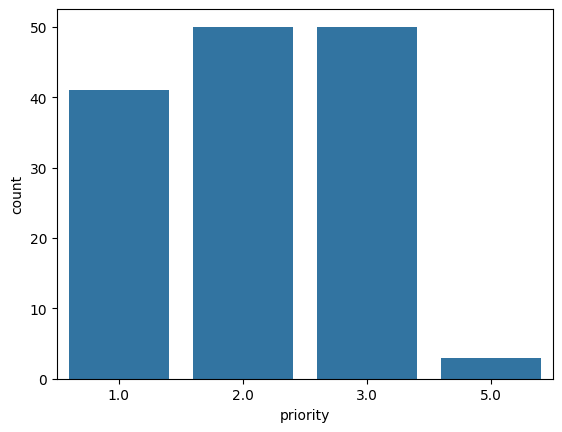

In [383]:
sns.countplot(data=df_balanced, x='priority')

In [384]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [385]:
xtrain, xtest, ytrain, ytest = train_test_split(df_balanced['cleaned_text'], df_balanced['priority'], test_size=0.2, random_state=42)

In [386]:
pipe_bl=Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                    ('rfc', RandomForestClassifier())])

In [387]:
pipe_bl.fit(xtrain, ytrain)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier())])

In [388]:
pipe_bl.score(xtrain, ytrain)

0.991304347826087

In [389]:
pipe_bl.score(xtest, ytest)

0.6206896551724138

In [390]:
ypred = pipe_bl.predict(xtest)

In [391]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         1.0       1.00      0.25      0.40         8
         2.0       0.52      1.00      0.69        11
         3.0       0.83      0.50      0.62        10

    accuracy                           0.62        29
   macro avg       0.79      0.58      0.57        29
weighted avg       0.76      0.62      0.59        29



## After sampling there was signifant improvement in the classification model.